<div style="color: #D03952; background-color: #ffffe6; border-bottom: 1px solid #D03952; padding: 2em;">
<b style="font-size: 20pt;"> From Basic Machine Learning models to Advanced Kernel Learning</b> <br> <br>
<b style="font-size: 15pt; color: #D03952">Home Assignment 1</b>
    
**21 November 2022**

**Zineb Et-tarraf** 
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import cv2
from math import log, exp

def sig(x):
    return 1/(1 + np.exp(-x))

First of all, we need to prepare the training set and the test set by importing images from the given folders . We also have to prepare their labels.

In [2]:
def load_images_from_folder(foldername,label):
    images = []
    for filename in os.listdir(foldername):
        if ".png" in filename :
            img = plt.imread(os.path.join(foldername,filename)) 
            if img is not None :
                img = img.reshape(1,28*28)
                images.append([img[0],label])
            
    return images

train_set = []
train_set.extend(load_images_from_folder('data/train/A',1))
train_set.extend(load_images_from_folder('data/train/B',-1))
train_set.extend(load_images_from_folder('data/train/C',-1))

#Shuffle the samples 
random.shuffle(train_set)

We will do the same for the test set 

In [3]:
test_set = []
test_set.extend(load_images_from_folder('data/test/A',1))
test_set.extend(load_images_from_folder('data/test/B',-1))
test_set.extend(load_images_from_folder('data/test/C',-1))

#Shuffle the samples 
random.shuffle(test_set)

Let's take a look on our data 

The number of samples in the training set is : 6000
The number of samples in the test set is : 750
The number of the input features is : 784
The associated label is : -1


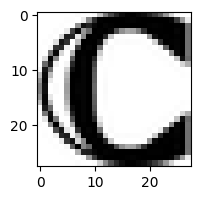

In [4]:
nbr_train_samples = len(train_set)
nbr_test_samples = len(test_set)
nbr_features = len(train_set[0][0])
print("The number of samples in the training set is :",nbr_train_samples)
print("The number of samples in the test set is :",nbr_test_samples)
print("The number of the input features is :",nbr_features)
# Let's pick randomly a sample in the trainset and display it with its label
index = random.randint(0,6000)
rd_sample = train_set[index][0]
plt.figure(figsize = (4,2))
plt.imshow(rd_sample.reshape(28,28),cmap='binary')
print("The associated label is :",train_set[index][1])

<div style="background-color: #ffffe6; border-left: 5px solid #ffffe6; padding: 0.5em;"> 
<b style="color: #D03952;">Question 5-a:</b>  
    <ul>
        <li> Implement the stochastic gradient descent algorithm (SGD) to solve these problems.
(a) Consider the logistic regression minimization problem. Plot the training errors and the test errors as
functions of the number of acess to the data points of SGD for well-chosen (by hand) values of the step
sizes</li>
    </ul>
</div>

In [5]:
def stochastic_gradient_descent(train_set,update_rule,loss,learning_rate,max_epoch): 
    
    # Implementing the stochastic gradient descent for any update_rule and for any loss function
    
    nbr_train_samples = len(train_set)
    nbr_features = len(train_set[0][0])  
    weights = np.zeros(nbr_features)
    bias = 0.0
    epoch = 0
    train_errors =[]
    while epoch <= max_epoch :
        for i in range(nbr_train_samples):
            sample_index = random.randint(0,nbr_train_samples-1)
            x = train_set[sample_index][0]
            y = train_set[sample_index][1]
            pred = np.dot(weights,x) + bias
            parameters = update_rule(weights, bias, learning_rate, x, y, pred)
            weights, bias = parameters[0], parameters[1]
            train_errors.append(loss(y,pred))
        epoch = epoch + 1 
    return weights, bias, np.mean(train_errors)


In [6]:
# Defining loss function for the logistic regression model 

def logistic_loss(y,pred):
    return log(1 + exp(-y * pred))

# Defining the update rules for the logistic regression model  

def logistic_update_rule(weights, bias, learning_rate, x, y, pred):
    weights = weights + learning_rate * y * (1 - sig(pred * y))*x
    bias = bias + learning_rate * y * (1 - sig(pred * y))
    return weights, bias

#Shuffle the samples 
random.shuffle(train_set)

In [7]:
def predict(weights, bias, x):
    return np.sign(np.dot(weights,x) + bias) 
def test_error(test_set,predict,loss,weights, bias):    
    # This function returns the mean test error over a set using a model already trained (weights, bias)
    test_errors = []
    for sample in test_set:
        y_pred = predict(weights, bias, sample[0])
        test_errors.append(loss(sample[1],y_pred))       
    return np.mean(test_errors)

- As the dataset is already shuffeld we will train the model on the first 1000 samples then on 2000 .. till 6000 with 100 passes on the data and a learning rate of 0.01 .Then each resulted model will be test over the test set

In [8]:
train_errors = []
test_errors = []
for i in range(1,7):
    training_results = stochastic_gradient_descent(train_set[:1000*i],logistic_update_rule,logistic_loss,0.1,100)
    weights, bias = training_results[0], training_results[1]
    train_errors.append(training_results[2])
    test_errors.append(test_error(test_set,predict,logistic_loss,weights, bias))

<Figure size 700x200 with 0 Axes>

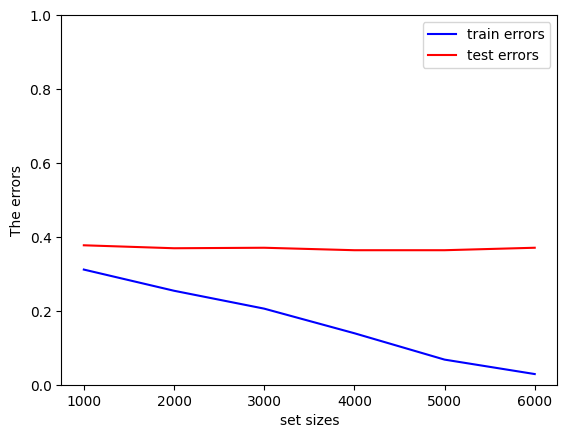

In [9]:
# Plotting the test error and the train error 

xx =[1000*i for i in range(1,7)]
plt.figure(figsize=(7, 2))
fig, ax = plt.subplots()
ax.plot(xx,train_errors[::-1], '-b', label='train errors')
ax.plot(xx,test_errors[::-1], '-r', label='test errors')
plt.legend()
plt.ylabel("The errors")
plt.xlabel("set sizes")
plt.ylim(0,1)
plt.show()  


- We can observe that the training error is decreasing when increasing the number of samples in the training which is true since the model learn more and more through the samples.
- The testing error is increasing when increasing the number of samples in the training because the model becomes too expressive and fits more and more the training set so it's working very bad with unseen data set ( overfitting )

#### Let's enjoy testing the logistic regression model 

The associated label is : -1.0


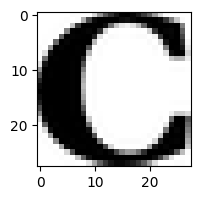

In [10]:
# Testing the model with a sample taken randomly from the test set => run it muktiple to see more examples 

index = random.randint(0,750)
rd_sample = test_set[index][0]
plt.figure(figsize = (4,2))
plt.imshow(rd_sample.reshape(28,28),cmap='binary')
print("The associated label is :",predict(weights, bias,rd_sample ))

<div style="background-color: #ffffe6; border-left: 5px solid #ffffe6; padding: 0.5em;"> 
<b style="color: #D03952;">Question 5-b:</b>  
    <ul>
        <li>  Plot as images the estimators for t (gradient iterations) in {10, 100, 1 000, 10 000}. Repeat for the linear least squares
regression (OLS) and perceptron.</li>
    </ul>
</div>

In [11]:
# Defining loss functions 

def square_loss(y,pred):
    return (pred-y)**2

def loss_0_1(y,pred):
    return 1 if y != pred else 0
def perceptron_loss(y,pred):
    if pred==y:
        return 0
    else:
        return 1
    

# Defining update rules for each model 

def square_update_rule(weights, bias, learning_rate, x, y, pred):
    weights = weights + learning_rate * (y - np.sign(pred)) * x
    bias = bias +   learning_rate * (y - np.sign(pred))
    return weights, bias

def perceptron_update_rule(weights, bias, learning_rate, x, y, pred):
    weights = weights + learning_rate * y * x
    bias = bias + learning_rate * y
    return weights, bias


iterations = [10, 100, 1000,10000]
# results_logistic is a list that will contain 4 OLS models using respectively 10,100,1000,10000 passes on the data set 
results_logistic = []
# results_square is a list that will contain 4 OLS models using respectively 10,100,1000,10000 passes on the data set 
results_square = []
# results_perceptron is a list that will contain 4 OLS models using respectively 10,100,1000,10000 passes on the data set 
results_perceptron = []

for t in iterations :
    results_square.append(stochastic_gradient_descent(train_set,square_update_rule,square_loss,0.01,t))
    results_logistic.append(stochastic_gradient_descent(train_set,logistic_update_rule,logistic_loss,0.01,t))
    results_perceptron.append(stochastic_gradient_descent(train_set,logistic_update_rule,logistic_loss,0.01,t))
    

#### Plotting estimators as images for four logistic regression models trained on 10 ,100,1000,1000 iterations

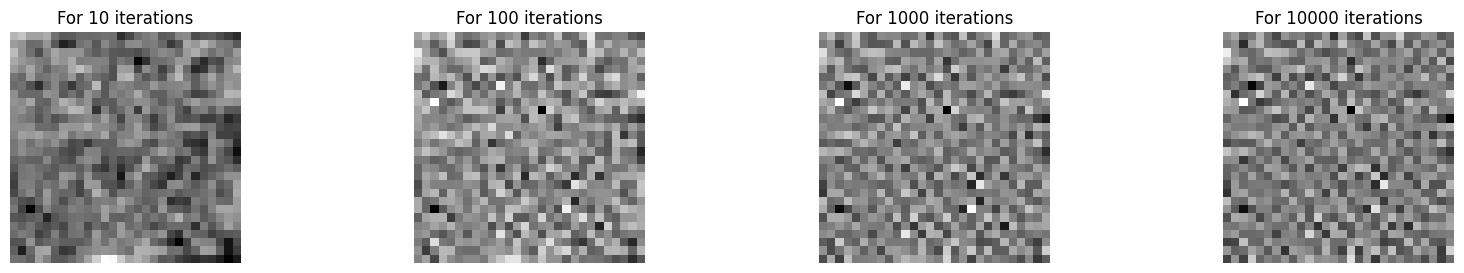

In [12]:
#For the OLS algorithm

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 3))
iterations = [10, 100, 1000,10000]
for ax, model, label in zip(axes, results_logistic, iterations):
    ax.set_axis_off()
    ax.imshow(model[0].reshape(28,28),cmap='binary')
    ax.set_title("For %i iterations" % label)
plt.subplots_adjust(hspace=1.5)
plt.show()

#### Plotting estimators as images for four OLS models trained  on 10 ,100,1000,1000 iterations

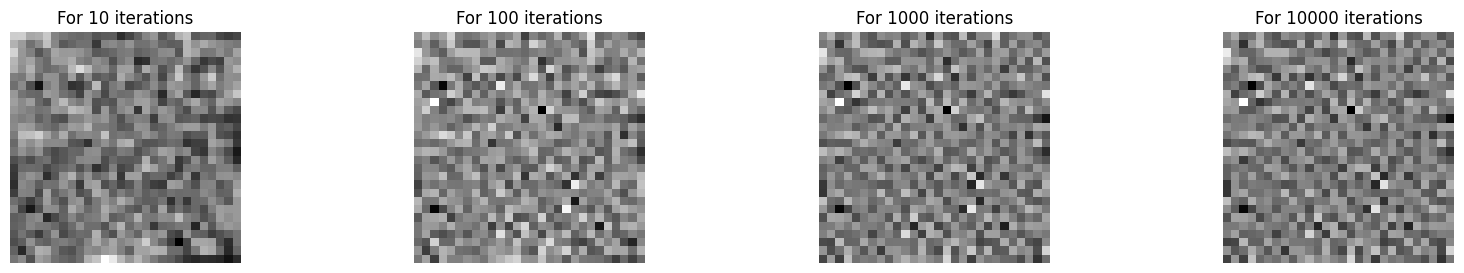

In [13]:
#For the OLS algorithm

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 3))
iterations = [10, 100, 1000,10000]
for ax, model, label in zip(axes, results_square, iterations):
    ax.set_axis_off()
    ax.imshow(model[0].reshape(28,28),cmap='binary')
    ax.set_title("For %i iterations" % label)
plt.subplots_adjust(hspace=1.5)
plt.show()    

#### Plotting estimators as images for three perceptron models trained  on 10 ,100,1000 iterations

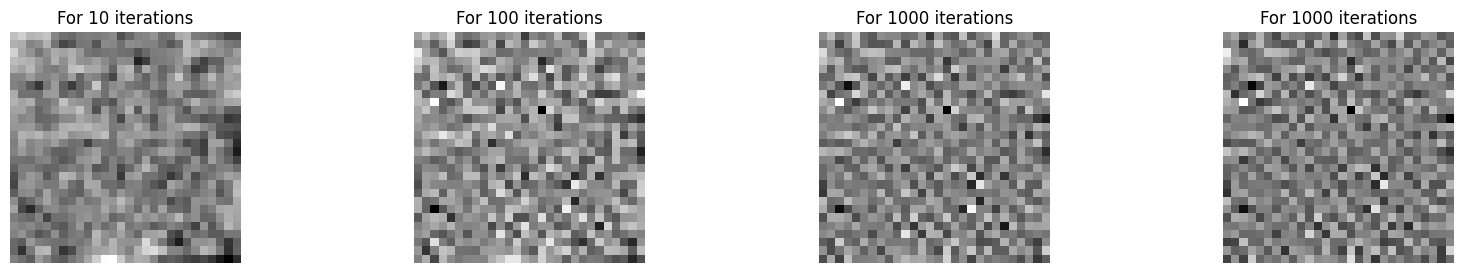

In [14]:
# For the perceptron algorithm

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 3))
iterations = [10, 100, 1000,1000]
for ax, model, label in zip(axes, results_perceptron, iterations):
    ax.set_axis_off()
    ax.imshow(model[0].reshape(28,28),cmap='binary')
    ax.set_title("For %i iterations" % label)
plt.show()   

The visualization of the weights as an image shows the weights of each pixel (feature ). These images have the size of the input images, and each weight is visualized at the position of the corresponding visible unit. The gray values represent the size of the weights.

#### Let's enjoy testing the OLS model trained over 10000 iterations

The associated label is : -1.0


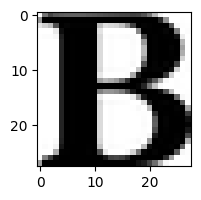

In [15]:
# Testing the model with a sample taken randomly from the test set => run it muktiple to see more examples

# Using the last trained OLS model (over 10000 iterations)
model = results_square[3]

weights, bias = model[0],model[1]
index = random.randint(0,750)
rd_sample = test_set[index][0]
plt.figure(figsize = (4,2))
plt.imshow(rd_sample.reshape(28,28),cmap='binary')
print("The associated label is :",predict(weights, bias,rd_sample ))

#### Let's enjoy testing the perceptron model

The associated label is : -1.0


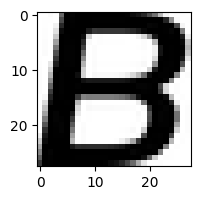

In [17]:
# Testing the model with a sample taken randomly from the test set => run it muktiple to see more examples 

# Using the last trained perceptron model (over 10000 iterations)
model = results_perceptron[3]

weights, bias = model[0],model[1]
index = random.randint(0,750)
rd_sample = test_set[index][0]
plt.figure(figsize = (4,2))
plt.imshow(rd_sample.reshape(28,28),cmap='binary')
print("The associated label is :",predict(weights, bias,rd_sample ))

## Let's plot train and test error of the SGD of each algorithm over 10,100,1000,10000 iterations 

In [18]:
def errors_list_models(models):
    train_errors = []
    test_errors = []
    for model in models :
        train_errors.append(model[2])
        weights, bias = model[0], model[1]
        test_errors.append(test_error(test_set,predict,logistic_loss,weights, bias))
    return train_errors,test_errors


### Logistic regression

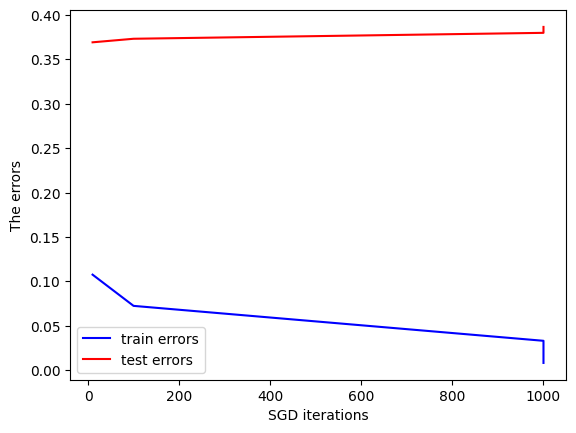

In [19]:
errors = errors_list_models(results_logistic)
train_errors,test_errors = errors[0],errors[1]

xx =[10,100,1000,1000]
fig, ax = plt.subplots()
ax.plot(xx,train_errors, '-b', label='train errors')
ax.plot(xx,test_errors, '-r', label='test errors')
plt.legend()
plt.ylabel("The errors")
plt.xlabel("SGD iterations")
plt.show()  

### Perceptron 

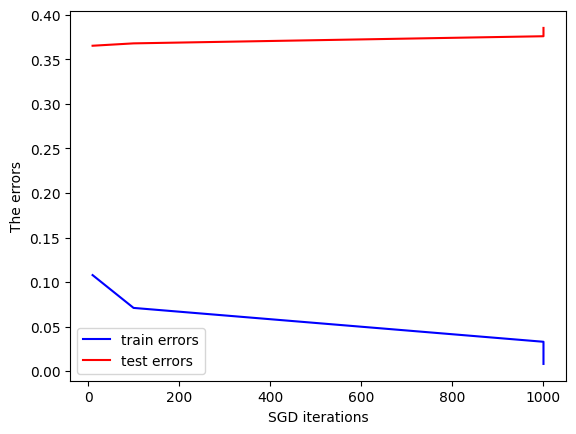

In [20]:
errors = errors_list_models(results_perceptron)
train_errors,test_errors = errors[0],errors[1]

xx =[10,100,1000,1000]
fig, ax = plt.subplots()
ax.plot(xx,train_errors, '-b', label='train errors')
ax.plot(xx,test_errors, '-r', label='test errors')
plt.legend()
plt.ylabel("The errors")
plt.xlabel("SGD iterations")
plt.show()  

<div style="background-color: #ffffe6; border-left: 5px solid #ffffe6; padding: 0.5em;"> 
<b style="color: #D03952;">Question 6-b:</b>  
    <ul>
        <li>  Implement the KNN model and plot as a function of k, its training and test errors</li>
    </ul>
</div>

In [21]:
#Euclidean Distance

def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist

def nearest_neighbors(train_set,test_sample,k):
    
    #calculate distances from a test sample to every sample in a training set
    distances=[]
    for i in range(len(train_set)):
        distances.append((train_set[i][1],eucledian(train_set[i][0],test_sample[0])))
        distances.sort(key=lambda x:x[1])#sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(k): #get first k samples
        neighbors.append(distances[i][0])
    return neighbors
                         
def knn_predict(train_set,test_sample,k):
                         
    neighbors=nearest_neighbors(train_set,test_sample,k)
    labels=[sample for sample in neighbors]
    # take the label that appears the most in the neighbors
    prediction=max(labels,key=labels.count)
    return prediction
 

#### Let's enjoy testing the KNN model

The associated label is : -1


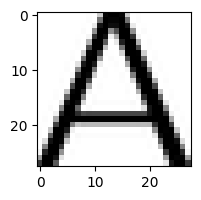

In [23]:
index = random.randint(0,750)
rd_sample = test_set[index][0]
pred = knn_predict(train_set,rd_sample,5)
rd_sample = test_set[index][0]
plt.figure(figsize = (4,2))
plt.imshow(rd_sample.reshape(28,28),cmap='binary')
print("The associated label is :",pred )

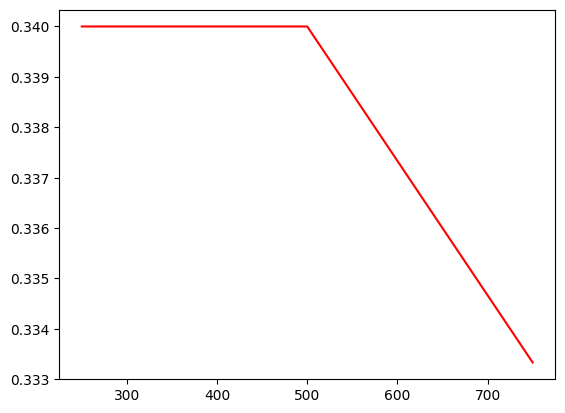

In [31]:
def knn_test_error(test_set,train_set,k):
    errors =[]
    for sample in test_set:
        pred = knn_predict(train_set,rd_sample,k)
        errors.append(loss_0_1(sample[1],pred))
    return np.mean(errors)

xx =[250*i for i in range(1,4)]
errors = [knn_test_error(test_set[:250*i],train_set[:2000],5) for i in range(1,4)]
fig, ax = plt.subplots()
ax.plot(xx,errors, '-r', label='test errors')
plt.show() 

<div style="background-color: #ffffe6; border-left: 5px solid #ffffe6; padding: 0.5em;"> 
<b style="color: #D03952;">Question 7:</b>  
    <ul>
        <li>  Multi-layer Perceptron (MLP). Given a multi-layer perceptron with 1 input layer containing 28 × 28 neurons,1 hidden layer containing 32 neurons, and 1 output layer containing 3 neurons (one for each class), how many parameters need to be trained? Implement it with ReLu activation function by using your favorite library.</li>
    </ul>
</div>

In [470]:
import torch

# We will use Sequential object from pytorch to construct our model

network = torch.nn.Sequential(torch.nn.Linear(28*28, 32),torch.nn.ReLU(),
                              torch.nn.Linear(32, 3),torch.nn.ReLU(),)

# Defining an optimizer 
optimizer = torch.optim.SGD(network.parameters(), lr=0.01)
# Defining a loss fcts to minimize
loss_function = torch.nn.MSELoss()

# Data Preparation
n_input, n_hidden, n_out, batch_size, learning_rate = 28*28, 32, 3, 10, 0.01

def train_model(train_set):
    losses = []
    for epoch in range(10):
        for sample in train_set :
            logits = network(torch.tensor(sample[0], dtype=torch.float))
            outputs_props = torch.distributions.Categorical(logits = logits).probs
            pred_y = 1 if torch.argmax(outputs_props).item() == 0 else -1
            network.zero_grad()
            optimizer.step()

train_model(train_set)


#### Let's enjoy testing the network model

The associated label is : 1


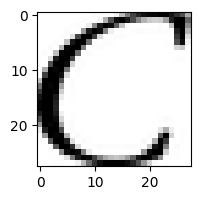

In [481]:
# Testing the model with a sample taken randomly from the test set => run it muktiple to see more examples 

model = results_square[2]
weights, bias = model[0],model[1]
index = random.randint(0,750)
rd_sample = test_set[index][0]
plt.figure(figsize = (4,2))
plt.imshow(rd_sample.reshape(28,28),cmap='binary')
logits = network(torch.tensor(rd_sample, dtype=torch.float))
outputs_props = torch.distributions.Categorical(logits = logits).probs
pred = 1 if torch.argmax(outputs_props).item() == 0 else -1
print("The associated label is :",pred)